In [1036]:
import pandas as pd

In [1037]:
import os
import pandas as pd

# Specify the folder containing your Excel files
data_folder = "Data"

# Define the column names
col_names = ['Case ID', 'Suspect Product Active Ingredients', #'Reason for Use', 
             'Serious', 'Sex', 'Patient Age', 'Patient Weight']

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame(columns=col_names)

# Iterate over all Excel files in the folder
for file in os.listdir(data_folder):
    if file.endswith(".xlsx"):  # Check if the file is an Excel file
        file_path = os.path.join(data_folder, file)
        # Read the Excel file and add it to the combined DataFrame
        data = pd.read_excel(file_path, usecols=col_names)  # Load only the specified columns
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# Display the combined dataset
print(combined_data)

       Case ID                 Suspect Product Active Ingredients  \
0     24791405                         Semaglutide;Insulin Aspart   
1     24791400                                     Insulin Aspart   
2     24787265  Dextrose Monohydrate\Sodium Chloride;Fluticaso...   
3     24786424        Insulin Degludec\Liraglutide;Insulin Aspart   
4     24786413                       Insulin Human;Insulin Aspart   
...        ...                                                ...   
7861   5635607                                       Insulin Beef   
7862   5635606                                       Insulin Beef   
7863   4387583                                       Insulin Beef   
7864   4387509    Insulin Pork\Insulin Purified Pork;Insulin Beef   
7865   4250549                                       Insulin Beef   

          Serious     Sex Patient Age Patient Weight  
0         Serious    Male       72 YR  Not Specified  
1         Serious  Female       76 YR  Not Specified  
2     

In [1038]:
col_names = ['Case ID', 'Suspect Product Active Ingredients', 'Reason for Use', 'Serious', 'Sex', 'Patient Age', 'Patient Weight']

# load dataset
#data = pd.read_excel("Data\\Line Listing(dxjZy).xlsx")

In [1039]:
data.head()

,Case ID,Suspect Product Active Ingredients,Serious,Sex,Patient Age,Patient Weight
0,24750965,Insulin Beef;Semaglutide,Serious,Male,75 YR,Not Specified
1,24391183,Lithium;Risperidone;Lisinopril;Insulin Beef,Serious,Female,73 YR,Not Specified
2,23344407,Oseltamivir Phosphate;Betamethasone;Insulin De...,Serious,Male,80 YR,69 KG
3,23127579,Furosemide;Sennosides;Calcium Carbonate;Crosca...,Serious,Male,65 YR,Not Specified
4,23840947,Biotin;Vitamin D Nos;Dietary Supplement;Steari...,Serious,Male,80 YR,69 KG


In [1040]:
selected_columns = ['Case ID', 'Suspect Product Active Ingredients', 'Serious', 'Sex', 'Patient Age', 'Patient Weight']

#df = data[selected_columns]
df = combined_data[selected_columns]

df.head()
print(df)

       Case ID                 Suspect Product Active Ingredients  \
0     24791405                         Semaglutide;Insulin Aspart   
1     24791400                                     Insulin Aspart   
2     24787265  Dextrose Monohydrate\Sodium Chloride;Fluticaso...   
3     24786424        Insulin Degludec\Liraglutide;Insulin Aspart   
4     24786413                       Insulin Human;Insulin Aspart   
...        ...                                                ...   
7861   5635607                                       Insulin Beef   
7862   5635606                                       Insulin Beef   
7863   4387583                                       Insulin Beef   
7864   4387509    Insulin Pork\Insulin Purified Pork;Insulin Beef   
7865   4250549                                       Insulin Beef   

          Serious     Sex Patient Age Patient Weight  
0         Serious    Male       72 YR  Not Specified  
1         Serious  Female       76 YR  Not Specified  
2     

In [1041]:
df['Suspect Product Active Ingredients'] = df['Suspect Product Active Ingredients'].str.split(';')
df_split = df.explode('Suspect Product Active Ingredients', ignore_index=True)

df_split.head()

,Case ID,Suspect Product Active Ingredients,Serious,Sex,Patient Age,Patient Weight
0,24791405,Semaglutide,Serious,Male,72 YR,Not Specified
1,24791405,Insulin Aspart,Serious,Male,72 YR,Not Specified
2,24791400,Insulin Aspart,Serious,Female,76 YR,Not Specified
3,24787265,Dextrose Monohydrate\Sodium Chloride,Serious,Male,80 YR,69 KG
4,24787265,Fluticasone Furoate,Serious,Male,80 YR,69 KG


In [1042]:
count = df_split['Serious'].value_counts()

print(count)

Serious
Serious        38611
Non-Serious     3132
Name: count, dtype: int64


In [1043]:
print(df_split.dtypes)

Case ID                               object
Suspect Product Active Ingredients    object
Serious                               object
Sex                                   object
Patient Age                           object
Patient Weight                        object
dtype: object


In [1044]:
df_multi = pd.get_dummies(df_split, columns = ['Suspect Product Active Ingredients'], prefix='', prefix_sep='')

df_multi = df_multi.groupby('Case ID').max().reset_index()

columns_to_exclude = ['Case ID', 'Suspect Product Active Ingredients', 'Serious', 'Sex', 'Patient Age', 'Patient Weight']

columns_to_convert = [col for col in df_multi.columns if col not in columns_to_exclude]

df_multi[columns_to_convert] = df_multi[columns_to_convert].astype(int)

df_final = df_multi
print(df_multi.columns)
print(df_final)

df_final.head()

Index(['Case ID', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
       '.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate',
       '.Alpha.-Tocopherol', '.Alpha.-Tocopherol Acetate',
       '.Alpha.-Tocopherol Acetate, D-', '.Alpha.-Tocopherol Acetate, Dl-',
       ...
       'Warfarin Potassium', 'Warfarin Sodium', 'Xantofyl Palmitate',
       'Xylometazoline', 'Xylometazoline Hydrochloride', 'Zeaxanthin', 'Zinc',
       'Zoledronic Acid', 'Zolpidem Tartrate', 'Zopiclone'],
      dtype='object', length=1050)
       Case ID  Serious     Sex Patient Age Patient Weight  \
0      3026787  Serious    Male       77 YR        65.6 KG   
1      3027125  Serious  Female       78 YR  Not Specified   
2      3036071  Serious  Female       69 YR  Not Specified   
3      3117138  Serious    Male       79 YR  Not Specified   
4      3126962  Serious    Male       76 YR  Not Specified   
...        ...      ...     ...         ...            ...   
7762  24786413  Serious    Male     831 MTH  N

,Case ID,Serious,Sex,Patient Age,Patient Weight,.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,.Alpha.-Tocopherol,.Alpha.-Tocopherol Acetate,".Alpha.-Tocopherol Acetate, D-",".Alpha.-Tocopherol Acetate, Dl-",...,Warfarin Potassium,Warfarin Sodium,Xantofyl Palmitate,Xylometazoline,Xylometazoline Hydrochloride,Zeaxanthin,Zinc,Zoledronic Acid,Zolpidem Tartrate,Zopiclone
0,3026787,Serious,Male,77 YR,65.6 KG,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3027125,Serious,Female,78 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3036071,Serious,Female,69 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3117138,Serious,Male,79 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3126962,Serious,Male,76 YR,Not Specified,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1045]:
df_encoded = df_multi.copy()
print(df_encoded.columns)
#print(df_split['Patient Age'])
df_encoded['Patient Age'] = df_encoded['Patient Age'].astype(str)
df_encoded['Patient Age'] = df_encoded['Patient Age'].str.replace(r'\D+', '', regex=True)
df_encoded['Patient Age'] = pd.to_numeric(df_encoded['Patient Age'], errors='coerce')  # Converts to numeric, sets invalid values to NaN

df_encoded['Patient Weight'] = df_encoded['Patient Weight'].replace('Not Specified', "0 KG")
df_encoded['Patient Weight'] = df_encoded['Patient Weight'].astype(str)
df_encoded['Patient Weight'] = df_encoded['Patient Weight'].str.replace(r'[^\d.]', '', regex=True)
df_encoded['Patient Weight'] = pd.to_numeric(df_encoded['Patient Weight'], errors='coerce')

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

#df_encoded['Suspect Product Active Ingredients'] = label_encoder.fit_transform(df_encoded['Suspect Product Active Ingredients'])
df_encoded['Sex'] = label_encoder.fit_transform(df_encoded['Sex'])
df_encoded['Serious'] = label_encoder.fit_transform(df_encoded['Serious'])
print(df_encoded.isnull().sum())
df_encoded.dropna(inplace=True)
print(df_encoded.isnull().sum())
df_encoded.head()

Index(['Case ID', 'Serious', 'Sex', 'Patient Age', 'Patient Weight',
       '.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate',
       '.Alpha.-Tocopherol', '.Alpha.-Tocopherol Acetate',
       '.Alpha.-Tocopherol Acetate, D-', '.Alpha.-Tocopherol Acetate, Dl-',
       ...
       'Warfarin Potassium', 'Warfarin Sodium', 'Xantofyl Palmitate',
       'Xylometazoline', 'Xylometazoline Hydrochloride', 'Zeaxanthin', 'Zinc',
       'Zoledronic Acid', 'Zolpidem Tartrate', 'Zopiclone'],
      dtype='object', length=1050)
Case ID               0
Serious               0
Sex                   0
Patient Age          17
Patient Weight        0
                     ..
Zeaxanthin            0
Zinc                  0
Zoledronic Acid       0
Zolpidem Tartrate     0
Zopiclone             0
Length: 1050, dtype: int64
Case ID              0
Serious              0
Sex                  0
Patient Age          0
Patient Weight       0
                    ..
Zeaxanthin           0
Zinc                 0
Zoled

,Case ID,Serious,Sex,Patient Age,Patient Weight,.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,.Alpha.-Tocopherol,.Alpha.-Tocopherol Acetate,".Alpha.-Tocopherol Acetate, D-",".Alpha.-Tocopherol Acetate, Dl-",...,Warfarin Potassium,Warfarin Sodium,Xantofyl Palmitate,Xylometazoline,Xylometazoline Hydrochloride,Zeaxanthin,Zinc,Zoledronic Acid,Zolpidem Tartrate,Zopiclone
0,3026787,1,1,77.0,65.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3027125,1,0,78.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3036071,1,0,69.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3117138,1,1,79.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3126962,1,1,76.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1046]:
count = df_encoded['Serious'].value_counts()

print(count)

Serious
1    5898
0    1852
Name: count, dtype: int64


In [1047]:
cols_to_exclude = ['Case ID', 'Suspect Product Active Ingredients']

feature_cols = [col for col in df_encoded.columns if col not in cols_to_exclude]

print(feature_cols)
print(len(feature_cols))

X = df_encoded[feature_cols]
Y = df_encoded.Serious

['Serious', 'Sex', 'Patient Age', 'Patient Weight', '.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate', '.Alpha.-Tocopherol', '.Alpha.-Tocopherol Acetate', '.Alpha.-Tocopherol Acetate, D-', '.Alpha.-Tocopherol Acetate, Dl-', '.Alpha.-Tocopherol Succinate, D-', '.Alpha.-Tocopherol Succinate, Dl-', '.Alpha.-Tocopherol, D-', '.Alpha.-Tocopherol, Dl-', '.Alpha.-Tocopherol, Dl-\\Fish Oil', '.Alpha.-Tocopherol\\Allantoin', '.Beta.-Carotene', 'Abiraterone Acetate', 'Acarbose', 'Acebutolol', 'Acebutolol Hydrochloride', 'Acenocoumarol', 'Acetaminophen', 'Acetaminophen\\Belladonna Leaf\\Caffeine\\Opium', 'Acetaminophen\\Chlorpheniramine\\Dextromethorphan\\Diphenhydramine\\Doxylamine\\Pseudoephedrine', 'Acetaminophen\\Chlorpheniramine\\Dextromethorphan\\Pseudoephedrine Hydrochloride', 'Acetaminophen\\Codeine Phosphate', 'Acetaminophen\\Codeine Phosphate\\Meprobamate', 'Acetaminophen\\Dextromethorphan Hydrobromide\\Doxylamine Succinate', 'Acetaminophen\\Dihydrocodeine', 'Acetaminophen\\Hydrocodon

In [1048]:
X.head()


,Serious,Sex,Patient Age,Patient Weight,.Alpha.-Glucose-1-Phosphate Disodium Tetrahydrate,.Alpha.-Tocopherol,.Alpha.-Tocopherol Acetate,".Alpha.-Tocopherol Acetate, D-",".Alpha.-Tocopherol Acetate, Dl-",".Alpha.-Tocopherol Succinate, D-",...,Warfarin Potassium,Warfarin Sodium,Xantofyl Palmitate,Xylometazoline,Xylometazoline Hydrochloride,Zeaxanthin,Zinc,Zoledronic Acid,Zolpidem Tartrate,Zopiclone
0,1,1,77.0,65.6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,78.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,69.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,79.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,76.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1049]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Address class imbalance using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Standardize the data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=26)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=26)

#!pip install imbalanced-learn

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [1050]:
import warnings
warnings.filterwarnings("ignore")

!pip install torch -q


In [1051]:

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader

# Convert data to torch tensors
class Data(Dataset):
    def __init__(self, X, y):
        #self.X = torch.from_numpy(X.to_numpy().astype(np.float32))
        #self.y = torch.from_numpy(y.to_numpy().astype(np.float32))
        self.X = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.to_numpy().astype(np.float32))
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

# Instantiate training and test data
train_data = Data(X_train, y_train)
#train_data = Data(X_resampled, y_resampled)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

valid_data = Data(X_val, y_val)
valid_dataloader = DataLoader(dataset=valid_data, batch_size=batch_size, shuffle=False)

# Check it's working
for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break


Batch: 1
X shape: torch.Size([64, 1049])
y shape: torch.Size([64])


In [1052]:
import torch
from torch import nn
from torch import optim

input_dim = len(feature_cols) #393
hidden_dim = 512 #400
output_dim = 1

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        
        # Define multiple layers
        self.layer_1 = nn.Linear(input_dim, hidden_dim // 32)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        
        self.layer_2 = nn.Linear(hidden_dim // 32, hidden_dim // 64)  # Hidden layer (reduce size)
        nn.init.kaiming_uniform_(self.layer_2.weight, nonlinearity="relu")
        
        #self.layer_3 = nn.Linear(hidden_dim // 2, hidden_dim // 4)  # Another hidden layer
        #nn.init.kaiming_uniform_(self.layer_3.weight, nonlinearity="relu")
        
        self.output_layer = nn.Linear(hidden_dim // 64, output_dim)  # Final output layer
        
    def forward(self, x):
        # Pass through layers with ReLU activations
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.relu(self.layer_2(x))
        #x = torch.nn.functional.relu(self.layer_3(x))
        x = torch.nn.functional.sigmoid(self.output_layer(x))  # Sigmoid for binary output
        return x
       
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=1049, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=8, bias=True)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
)


In [1053]:
learning_rate = 0.1

loss_fn = nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
num_epochs = 5
train_loss_values = []
valid_loss_values = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for X, y in train_dataloader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward pass
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        train_loss += loss.item()

        # backward pass and optimization
        loss.backward()
        optimizer.step()

    # average training loss for the epoch
    train_loss /= len(train_dataloader)
    train_loss_values.append(train_loss)

    # Validation phase
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_val, y_val in valid_dataloader:
            pred = model(X_val)
            loss = loss_fn(pred, y_val.unsqueeze(-1))
            val_loss += loss.item()
    
    # Average validation loss for the epoch
    val_loss /= len(valid_dataloader)
    valid_loss_values.append(val_loss)

    # Print loss for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

print("Training Complete")

Epoch 1/3
Train Loss: 0.4115, Validation Loss: 0.1114
Epoch 2/3
Train Loss: 0.0521, Validation Loss: 0.0604
Epoch 3/3
Train Loss: 0.0313, Validation Loss: 0.0730
Training Complete


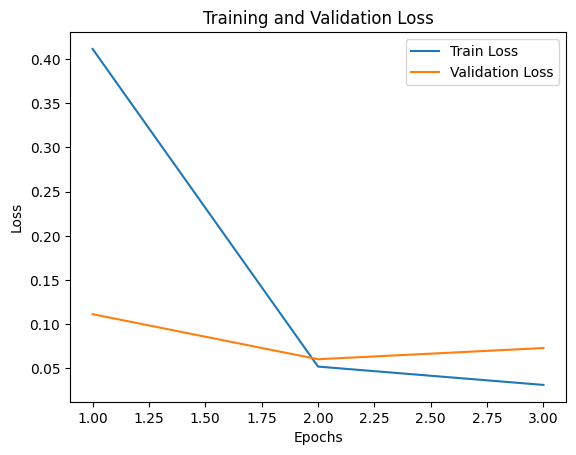

In [1055]:
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_loss_values, label='Train Loss')
plt.plot(range(1, num_epochs + 1), valid_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [1056]:
import itertools  # Import this at the top of your script

# Initialize required variables
y_pred = []
y_test = []
correct = 0
total = 0

"""
We're not training so we don't need to calculate the gradients for our outputs
"""
with torch.no_grad():
    for X, y in test_dataloader:
        outputs = model(X)  # Get model outputs
        predicted = np.where(outputs.numpy() < 0.5, 0, 1)  # Convert to NumPy and apply threshold
        predicted = list(itertools.chain(*predicted))  # Flatten predictions
        y_pred.append(predicted)  # Append predictions
        y_test.append(y.numpy())  # Append true labels as NumPy
        total += y.size(0)  # Increment total count
        correct += (predicted == y.numpy()).sum().item()  # Count correct predictions

print(f'Accuracy of the network on the test instances: {100 * correct // total}%')

Accuracy of the network on the test instances: 99%


In [1057]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns

y_pred = list(itertools.chain(*y_pred))
y_test = list(itertools.chain(*y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2398
         1.0       0.99      0.99      0.99      2321

    accuracy                           0.99      4719
   macro avg       0.99      0.99      0.99      4719
weighted avg       0.99      0.99      0.99      4719



In [1058]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[2386,   12],
       [  25, 2296]])

In [1059]:
import numpy as np
import random
import torch

# Exclude specific columns
columns_to_exclude = ['Case ID', 'Suspect Product Active Ingredients', 'Sex', 'Patient Age', 'Patient Weight']

# Create drug-related columns
drug_cols = [col for col in df_encoded.columns if col not in columns_to_exclude]

# Generate random drug data
random_drugs = random.sample(drug_cols, 3)#["Insulin Pork\Insulin Purified Pork", "Insulin Beef"] #random.sample(drug_cols, 3)
print("Patient Drugs: ", random_drugs)
drug_array = np.zeros(len(drug_cols))
column_indices = [df_encoded.columns.get_loc(col) for col in random_drugs]
for idx in column_indices:
    drug_array[idx - 5] = 1  # Adjust index as needed

# Create a specific patient profile
specific_profile = np.array([[1, 83, 65]])  # Adjust profile values as needed
specific_profile = np.concatenate([specific_profile, drug_array.reshape(1, -1)], axis=1)

# Ensure the feature order matches the training data
#columns_to_include = [col for col in X.columns if col not in columns_to_exclude]  # 'X' should be your training feature matrix
#specific_profile = specific_profile[:, :len(columns_to_include)]  # Align shape with training features

# Standardize the profile using the same scaler used during training
specific_profile_scaled = scaler.transform(specific_profile)  # 'scaler' is the StandardScaler from training

# Convert the profile to a PyTorch tensor
specific_profile_tensor = torch.tensor(specific_profile_scaled, dtype=torch.float32)

# Predict the outcome using your PyTorch model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    prediction = model(specific_profile_tensor)
    predicted_outcome = (prediction >= 0.5).float().item()  # Threshold of 0.5
    predicted_probability = prediction.item()

# Output the results
if predicted_outcome == 1.0:
    print("The reaction is classified as Serious.")
else:
    print("The reaction is classified as Non-Serious.")

print(f"Predicted Probability of Serious Reaction: {predicted_probability:.4f}")

Patient Drugs:  ['Prasugrel Hydrochloride', 'Esomeprazole Magnesium\\Naproxen', 'Ferrous Sulfate\\Folic Acid']
The reaction is classified as Serious.
Predicted Probability of Serious Reaction: 1.0000
